<a href="https://colab.research.google.com/github/gaesu96/gaesu_public/blob/main/%08yolo_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2024-05-01 11:45:20--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2024-05-01 11:45:20 (18.8 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [2]:
!mkdir ./pretrained
!echo "##### downloading pretrained yolo/tiny-yolo weight file and config file"
!wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true

!wget -O /content/pretrained/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -O /content/pretrained/yolov3-tiny.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true

!ls /content/pretrained

##### downloading pretrained yolo/tiny-yolo weight file and config file
--2024-05-01 11:48:05--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/pretrained/yolov3.weights’

/content/pretrained 100%[===================>] 236.52M  47.9MB/s    in 5.5s    

2024-05-01 11:48:10 (42.6 MB/s) - ‘/content/pretrained/yolov3.weights’ saved [248007048/248007048]

--2024-05-01 11:48:10--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2024-05-01 11:48:11--  https://github.com/pjr

In [3]:
import os
import cv2

weight_path = '/content/pretrained/yolov3.weights'
config_path = '/content/pretrained/yolov3.cfg'

cv_net = cv2.dnn.readNetFromDarknet(config_path, weight_path)

In [4]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [7]:
layer_names = cv_net.getLayerNames()

print(layer_names)
print(cv_net.getUnconnectedOutLayers())
print([layer_names[i - 1] for i in cv_net.getUnconnectedOutLayers()])

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [8]:
layer_names = cv_net.getLayerNames()
outlayer_names = [layer_names[i - 1] for i in cv_net.getUnconnectedOutLayers()]
print(outlayer_names)

img = cv2.imread('/content/data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv_net.setInput(cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416,416), swapRB=True, crop=False))

cv_outs = cv_net.forward(outlayer_names)
print(cv_outs)

['yolo_82', 'yolo_94', 'yolo_106']
(array([[0.03803743, 0.04702331, 0.38768214, ..., 0.        , 0.        ,
        0.        ],
       [0.04705842, 0.03385845, 0.26896054, ..., 0.        , 0.        ,
        0.        ],
       [0.04941485, 0.03791982, 0.71518296, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9585798 , 0.9460585 , 0.35046652, ..., 0.        , 0.        ,
        0.        ],
       [0.9601501 , 0.9630716 , 0.2972418 , ..., 0.        , 0.        ,
        0.        ],
       [0.96636355, 0.9657401 , 0.7935618 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01637365, 0.02457963, 0.0468463 , ..., 0.        , 0.        ,
        0.        ],
       [0.01678773, 0.01458678, 0.4620319 , ..., 0.        , 0.        ,
        0.        ],
       [0.02219823, 0.01376948, 0.06627173, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97421783, 0.97686917, 0.04557492, ..., 0.        , 0.        ,
    

In [26]:
import numpy as np

# 원본 이미지를 네트웍에 입력시에는 (416, 416)로 resize 함.
# 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows = img.shape[0]
cols = img.shape[1]

conf_threshold = 0.5
nms_threshold = 0.4

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

class_ids = []
confidences = []
boxes = []

# 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화
for ix, output in enumerate(cv_outs):
    print('output shape:', output.shape)
    # feature map에 있는 anchor 갯수만큼 iteration하면서 Detected 된 Object 추출.(13x13x3, 26x26x3, 52x52x3)
    for jx, detection in enumerate(output):
        # class score는 detetection배열에서 5번째 이후 위치에 있는 값.
        class_scores = detection[5:]
        # class_scores배열에서 가장 높은 값을 가지는 값이 class confidence, 그리고 그때의 위치 인덱스가 class id
        class_id = np.argmax(class_scores)
        confidence = class_scores[class_id]

        # confidence가 지정된 conf_threshold보다 작은 값은 제외
        if confidence > conf_threshold:
            print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
            # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의 중심좌표와 너비/높이를 반환
            # 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)
            width = int(detection[2] * cols)
            height = int(detection[3] * rows)
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 좌표정보를 모두 수집
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])
print(cv_outs)

output shape: (507, 85)
ix: 0 jx: 316 class_id 0 confidence: 0.8499539
ix: 0 jx: 319 class_id 0 confidence: 0.9317015
ix: 0 jx: 325 class_id 0 confidence: 0.7301026
ix: 0 jx: 328 class_id 0 confidence: 0.9623244
ix: 0 jx: 334 class_id 0 confidence: 0.9984485
ix: 0 jx: 337 class_id 0 confidence: 0.9833524
ix: 0 jx: 343 class_id 0 confidence: 0.9978433
ix: 0 jx: 346 class_id 0 confidence: 0.63752526
output shape: (2028, 85)
ix: 1 jx: 831 class_id 2 confidence: 0.81699777
ix: 1 jx: 832 class_id 2 confidence: 0.7153828
ix: 1 jx: 877 class_id 2 confidence: 0.78542227
ix: 1 jx: 955 class_id 2 confidence: 0.8472696
ix: 1 jx: 1199 class_id 0 confidence: 0.7259762
ix: 1 jx: 1202 class_id 0 confidence: 0.9635838
ix: 1 jx: 1259 class_id 0 confidence: 0.97018635
ix: 1 jx: 1262 class_id 0 confidence: 0.9877816
ix: 1 jx: 1277 class_id 0 confidence: 0.9924558
ix: 1 jx: 1280 class_id 0 confidence: 0.99840033
ix: 1 jx: 1295 class_id 0 confidence: 0.6916557
ix: 1 jx: 1313 class_id 0 confidence: 0.920580

In [10]:
conf_threshold = 0.5
nms_threshold = 0.4
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

idxs

array([ 4, 17,  6, 15, 30, 28, 24, 32, 11,  8, 34, 33, 25, 29],
      dtype=int32)

In [12]:
idxs.flatten()

array([ 4, 17,  6, 15, 30, 28, 24, 32, 11,  8, 34, 33, 25, 29],
      dtype=int32)

person: 0.9984484910964966
person: 0.9984003305435181
person: 0.997843325138092
person: 0.9877815842628479
car: 0.9504100680351257
car: 0.9412014484405518
car: 0.9077373147010803
car: 0.9064124822616577
car: 0.847269594669342
car: 0.816997766494751
person: 0.7640699148178101
car: 0.6899797320365906
car: 0.6332457661628723
car: 0.6154051423072815


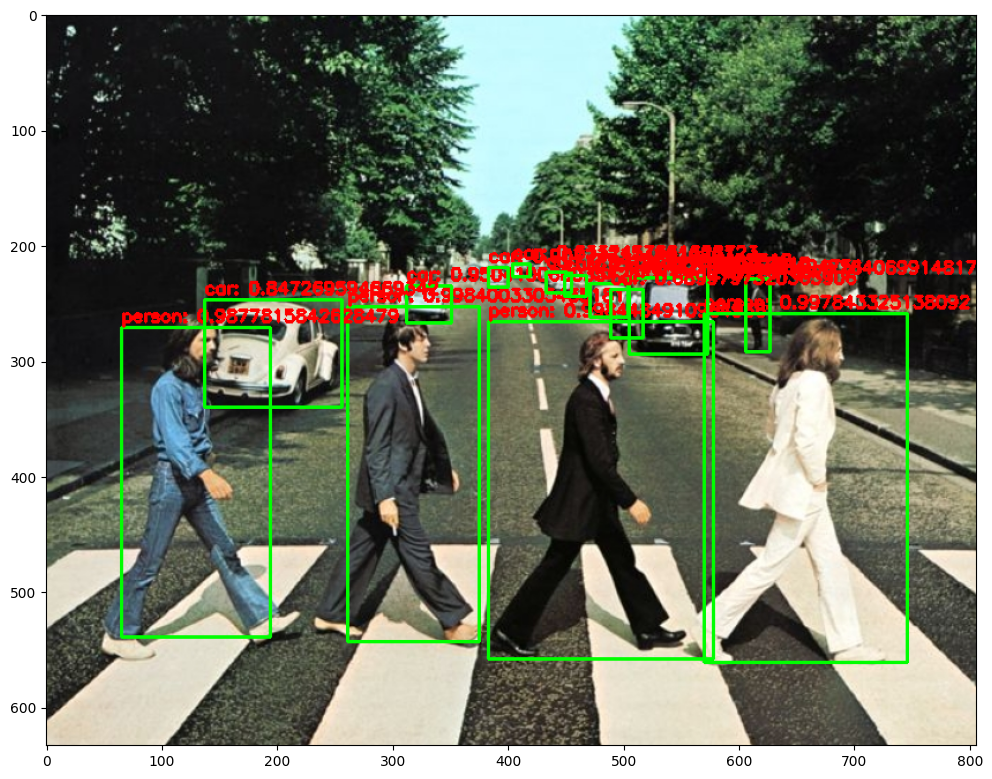

In [16]:
import matplotlib.pyplot as plt

draw_img = img.copy()

if len(idxs) > 0:
  for i in idxs:
    box = boxes[i]
    left = box[0]
    top = box[1]
    width = box[2]
    height = box[3]

    caption = f'{labels_to_names_seq[class_ids[i]]}: {confidences[i]}'
    cv2.rectangle(draw_img, (int(left), int(top)), (int(left + width), int(top + height)), green_color, 2)
    cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
    print(caption)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [17]:
def get_detected_img(cv_net, img_array, conf_threshold, nms_threshold, is_print=True):

    # 원본 이미지를 네트웍에 입력시에는 (416, 416)로 resize 함.
    # 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = img_array.copy()

    #전체 Darknet layer에서 13x13 grid, 26x26, 52x52 grid에서 detect된 Output layer만 filtering
    layer_names = cv_net.getLayerNames()
    # opencv DNN이 업그레이드 되면서 cv_net_yolo.getUnconnectedOutLayers()의 반환 결과가 2차원이 아니라 1차원 형태로 layer id가 반환됩니다.
    # 따라서 아래 코드는 강의 영상의 layers_names[i[0] - 1]에서 layers_names[i - 1] 로 변경합니다. 2022.08.09
    outlayer_names = [layer_names[i - 1] for i in cv_net.getUnconnectedOutLayers()]

    # 로딩한 모델은 Yolov3 416 x 416 모델임. 원본 이미지 배열을 사이즈 (416, 416)으로, BGR을 RGB로 변환하여 배열 입력
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
    start = time.time()
    # Object Detection 수행하여 결과를 cvOut으로 반환
    cv_outs = cv_net.forward(outlayer_names)
    layerOutputs = cv_net.forward(outlayer_names)
    # bounding box의 테두리와 caption 글자색 지정
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    class_ids = []
    confidences = []
    boxes = []

    # 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화
    for ix, output in enumerate(cv_outs):
        # Detected된 Object별 iteration
        for jx, detection in enumerate(output):
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            # confidence가 지정된 conf_threshold보다 작은 값은 제외
            if confidence > conf_threshold:
                #print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
                # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의 중심좌표와 너비/높이를 반환
                # 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
                center_x = int(detection[0] * cols)
                center_y = int(detection[1] * rows)
                width = int(detection[2] * cols)
                height = int(detection[3] * rows)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 좌표정보를 모두 수집
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # NMS로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object정보를 추출하고 시각화.
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    if len(idxs) > 0:
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)

    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")
    return draw_img

In [18]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import os

# image 로드
img = cv2.imread('/content/data/beatles01.jpg')

weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'

# darknet yolo pretrained 모델 로딩
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

Detection 수행시간: 6.33 초


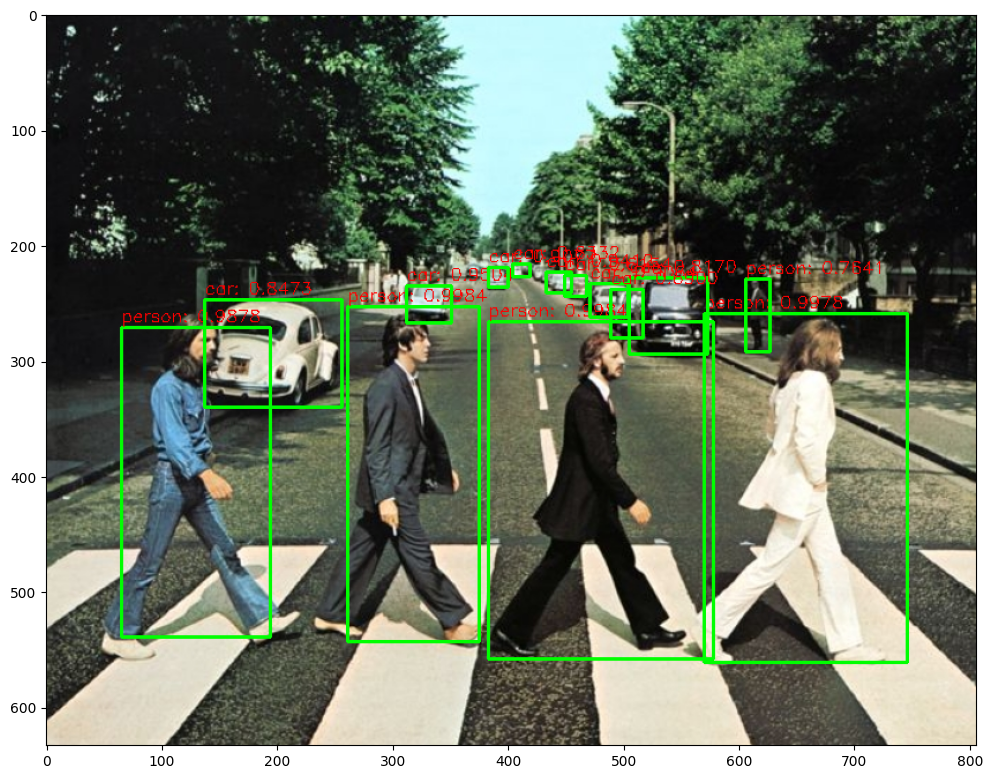

In [19]:
conf_threshold = 0.5
nms_threshold = 0.4
# Object Detetion 수행 후 시각화
draw_img = get_detected_img(cv_net_yolo, img, conf_threshold=conf_threshold, nms_threshold=nms_threshold, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)